In [1]:
from keras.models import load_model
from skimage.io import imread

import os

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/tenso

In [2]:
image_path = 'image_data/test_v2/' # path to images
model_path = 'U-Net.h5' # path to model
# weight_path = 'seg_model_weights_failed.hdf5'
weight_path = 'checkpoints/seg_model_weights_2.hdf5'
normalize = 1/255.0 # normalize the image to a pixel value [0, 1]
BATCH_SIZE = 10 # number of images for prediction per iteration
image_shape = (768, 768)

os.environ["CUDA_VISIBLE_DEVICES"]="1";

In [3]:
model = load_model(model_path) # loading model
model.load_weights('model_weights.h5')

W0122 20:02:24.897829 139876289881920 deprecation_wrapper.py:119] From /home/ubuntu/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0122 20:02:24.928701 139876289881920 deprecation_wrapper.py:119] From /home/ubuntu/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0122 20:02:24.951443 139876289881920 deprecation_wrapper.py:119] From /home/ubuntu/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0122 20:02:24.952079 139876289881920 deprecation_wrapper.py:119] From /home/ubuntu/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_se

In [4]:
def prepare_to_forward(img_path):
    batch = np.zeros((BATCH_SIZE, image_shape[0], image_shape[1], 3))
    images = os.listdir(img_path)
    test_images = np.random.choice(images, BATCH_SIZE)
    for i, image in enumerate(test_images):
        img = os.path.join(img_path, image)
        img = imread(img)
        if img.shape == batch[0].shape:
            batch[i, ...] = img
        
    return batch/255.0

In [27]:
x = prepare_to_forward(image_path)

In [28]:
y = model.predict(x)

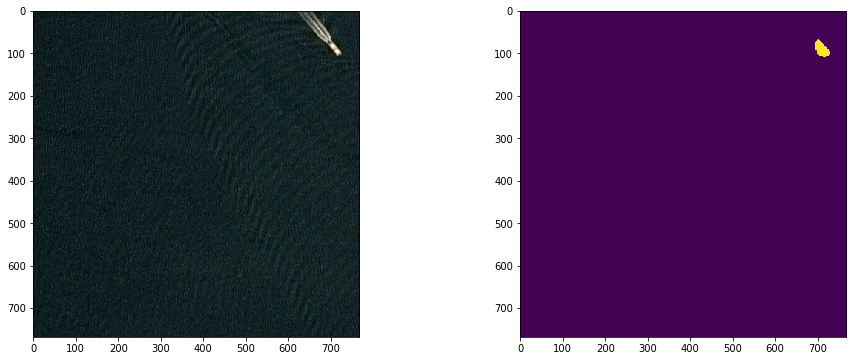

In [35]:
idx = 6

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6), sharex=True)
y1 = y[:,:,:,0][idx]

ax1.imshow(x[idx])
ax2.imshow(y1)